In [1]:
pip install kagglehub pandas seaborn matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]3 [ipywidgets]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def data_cleaning(df: pd.DataFrame):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)
    df['use_chip'] = df['use_chip'].astype('category')
    df['errors'] = df['errors'].astype('category')


def hist_chart(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['amount'], bins=50, kde=True)
    plt.title("Distribuição dos valores das transações")
    plt.xlabel("Valor")
    plt.ylabel("Frequência")
    plt.show()


def chart_2(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='use_chip')
    plt.title("Transações usando chip vs sem chip")
    plt.show()


def chart_3(df):
    top_cities = df['merchant_city'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_cities.index, y=top_cities.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 cidades com mais transações")
    plt.ylabel("Número de transações")
    plt.show()


def chart_4(df):
    transactions_per_day = df.groupby(df['date'].dt.date).size()

    plt.figure(figsize=(12, 6))
    transactions_per_day.plot()
    plt.title("Transações por dia")
    plt.xlabel("Data")
    plt.ylabel("Número de transações")
    plt.show()


def chart_5(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='errors', hue='use_chip')
    plt.title("Erros nas transações x Uso do chip")
    plt.xticks(rotation=45)
    plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_35733/2344767531.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)


In [4]:

# Set the path to the file you'd like to load
file_path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets") + '/transactions_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

df.info()
data_cleaning(df)
print("First 5 records:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB
First 5 records:
         id                date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01 00:02:00        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01 00:02:00       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01 00:05:00        430     2860  200.00  Swipe Transacti

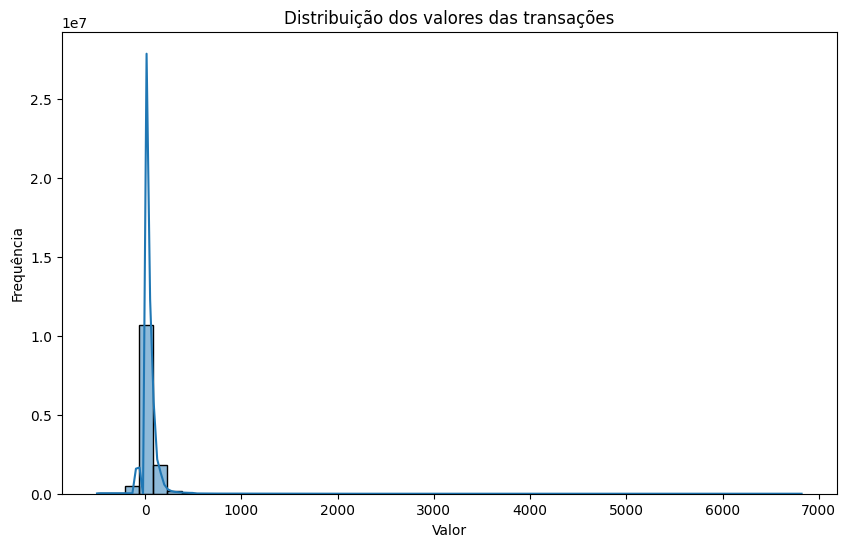

In [5]:
hist_chart(df)

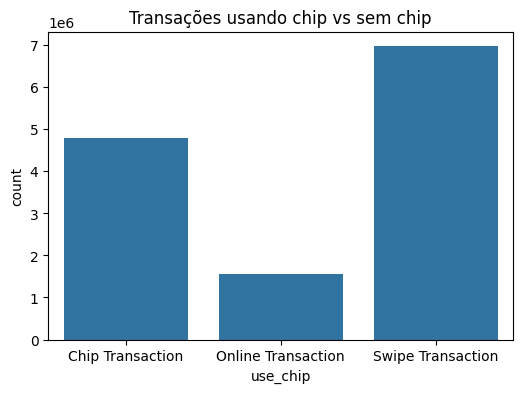

In [6]:
chart_2(df)

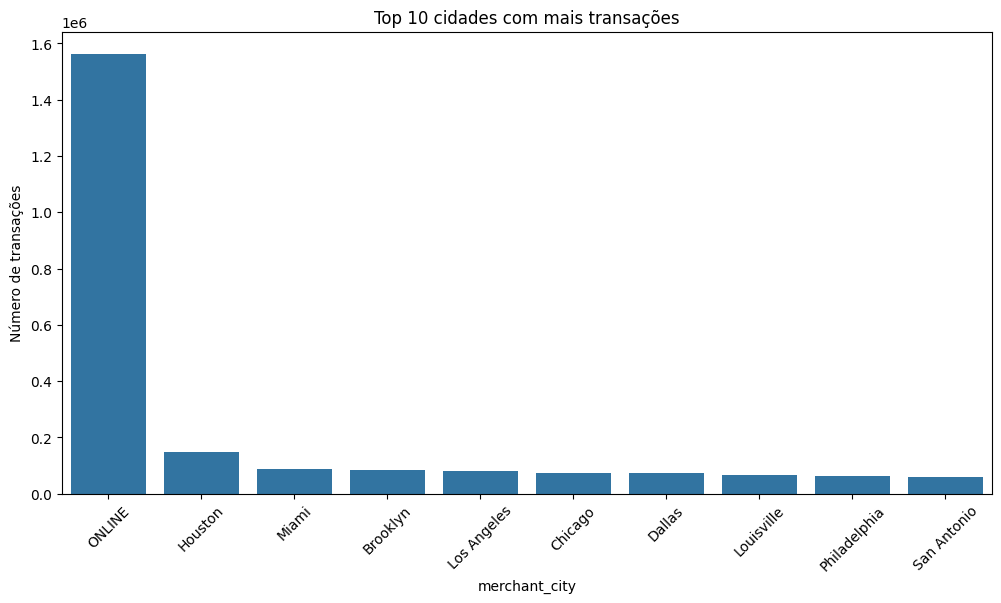

In [7]:
chart_3(df)

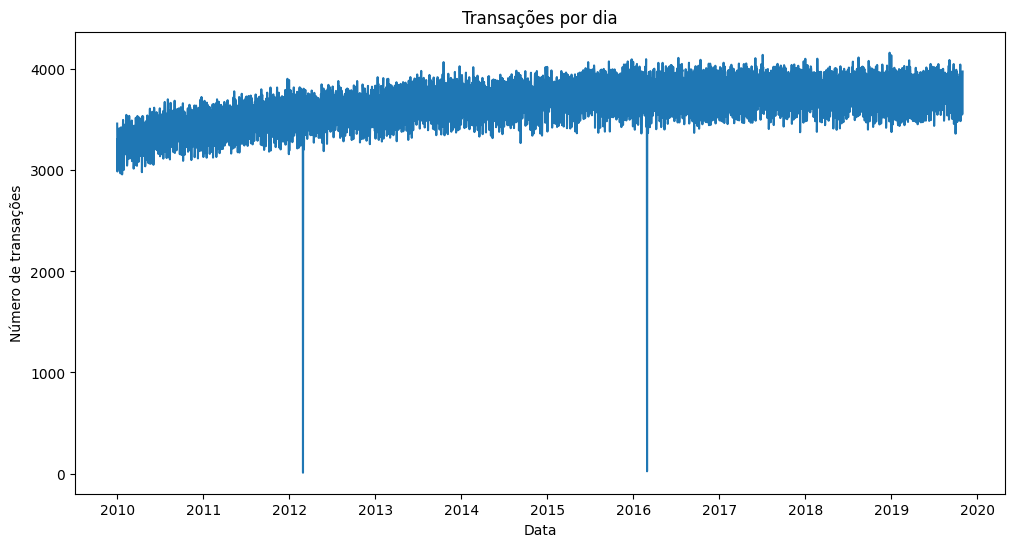

In [8]:
chart_4(df)

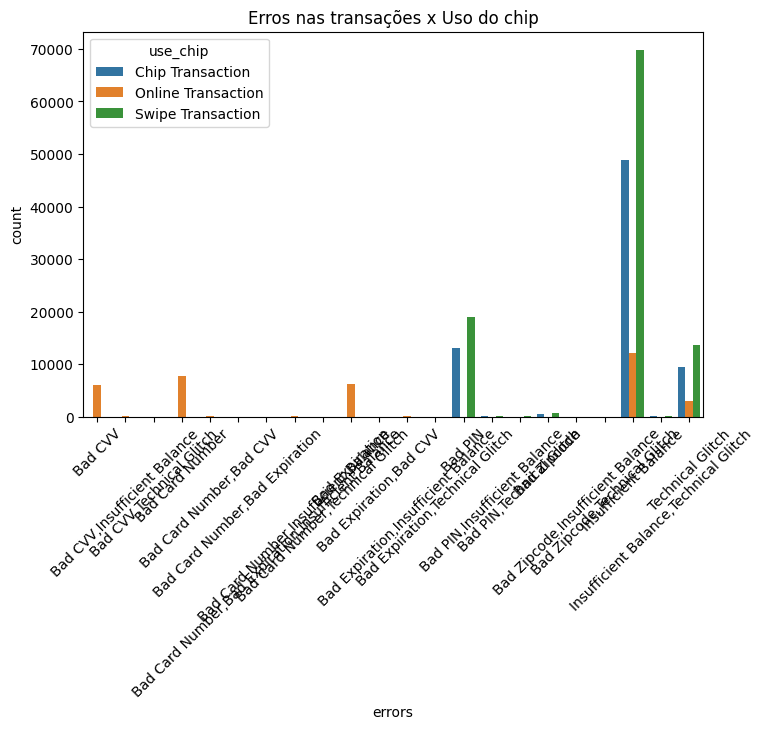

In [9]:
chart_5(df)